In [1]:
# import libraries
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/movie-predict/data/movies_metadata.csv", dtype={'popularity': 'str'})

In [3]:
df.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [5]:
df.shape

(45466, 24)

**Delete column doesn't matter or hard to process**

In [6]:
df = df.drop(['tagline'], axis=1)

In [7]:
df = df.drop(['imdb_id'], axis=1) 

In [8]:
df = df.drop(['id'], axis=1)

In [9]:
df = df.drop(['original_title'], axis=1)

In [10]:
df = df.drop(['overview'], axis=1)

In [11]:
df = df.drop(['title'], axis=1)

In [12]:
df = df.drop(['poster_path'], axis=1)

In [13]:
df = df.drop(['video'], axis=1)

In [14]:
df = df.drop(['belongs_to_collection'], axis=1)

**Check revenue equals 0?**

In [15]:
df[df['revenue'] == 0].shape 

(38052, 15)

In [16]:
df['revenue'] = df['revenue'].replace(0, np.nan) # thay thế giá trị 0 bằng giá trị nan

In [17]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce') # chuyền từ object về dạng float64

In [18]:
df[df['budget'] == 0].shape

(36573, 15)

In [19]:
df['budget'] = df['budget'].replace(0, np.nan)

In [20]:
df = df.dropna(subset=['budget', 'revenue'])

In [21]:
df.shape

(5381, 15)

In [22]:
df['adult'].value_counts()

adult
False    5381
Name: count, dtype: int64

In [23]:
df = df.drop(['adult'], axis=1)

In [24]:
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval) # điền vào các cột trống 

In [25]:
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [26]:
df['production_countries'] = df['production_countries'].apply(lambda x: len(x))

In [27]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [28]:
df['production_companies'] = df['production_companies'].apply(lambda x: len(x))

In [29]:
lang_df = pd.DataFrame(df['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']

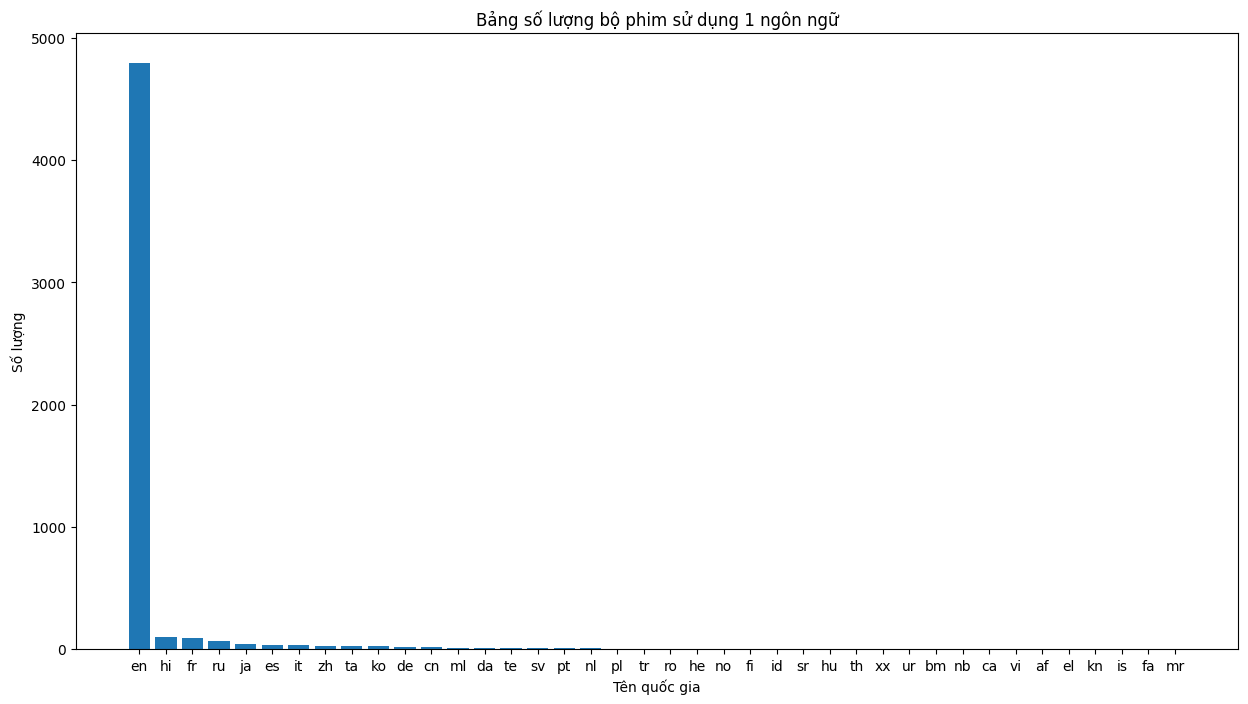

In [30]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)
ax.bar(lang_df.language, lang_df.number);
ax.set(title="Bảng số lượng bộ phim sử dụng 1 ngôn ngữ", ylabel="Số lượng", xlabel="Tên quốc gia");

In [31]:
df['lang_english'] = df['original_language'].apply(lambda x: 1 if x=='en' else 0)

In [32]:
df = df.drop(['original_language'], axis=1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5381 entries, 0 to 45422
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5381 non-null   float64
 1   genres                5381 non-null   object 
 2   homepage              1915 non-null   object 
 3   popularity            5381 non-null   object 
 4   production_companies  5381 non-null   int64  
 5   production_countries  5381 non-null   int64  
 6   release_date          5381 non-null   object 
 7   revenue               5381 non-null   float64
 8   runtime               5380 non-null   float64
 9   spoken_languages      5381 non-null   object 
 10  status                5381 non-null   object 
 11  vote_average          5381 non-null   float64
 12  vote_count            5381 non-null   float64
 13  lang_english          5381 non-null   int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 630.6+ KB


In [34]:
df['homepage'] = df['homepage'].fillna(0)

In [35]:
df['homepage'] = df['homepage'].apply(lambda x: 1 if x != 0 else 0)

In [36]:
df['homepage'].value_counts()

homepage
0    3466
1    1915
Name: count, dtype: int64

In [37]:
df['status'].value_counts()

status
Released           5377
Rumored               2
Post Production       2
Name: count, dtype: int64

In [38]:
df = df.drop(['status'], axis=1)

In [39]:
df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(ast.literal_eval).apply(lambda x: len(x) if isinstance(x, list) else np.nan)

In [40]:
df['spoken_languages'].value_counts()

spoken_languages
1    3742
2    1002
3     378
4     139
5      64
0      23
6      22
7       5
8       3
9       3
Name: count, dtype: int64

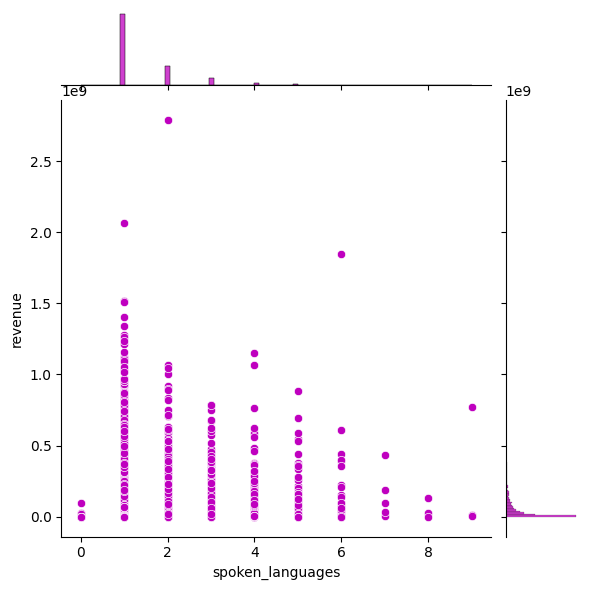

In [41]:
sns.jointplot(x="spoken_languages", y="revenue", data=df, color="m")

In [42]:
df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [43]:
df['genres'] = df['genres'].apply(lambda x: len(x))

In [44]:
df['genres'].value_counts()

genres
3    1743
2    1622
1     939
4     779
5     241
6      41
0      12
7       3
8       1
Name: count, dtype: int64

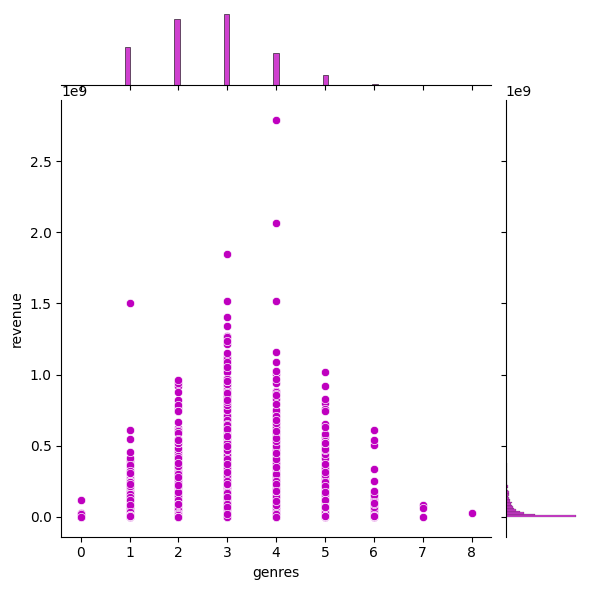

In [45]:
sns.jointplot(x="genres", y="revenue", data=df, color="m")

In [46]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [47]:
# function to change type to float
def convert_to_float(x):
    try:
        return float(x)
    except:
        return np.nan

In [48]:
df['year'] = df['year'].apply(convert_to_float).astype('float')

In [49]:
# function take month
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
def get_month(x):
    try:
        return months[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [50]:
df['month'] = df['release_date'].apply(get_month)

In [51]:
# month of rest
# 4,5,6,11 rest month 1 else not
# else 0
df['holiday'] = df['month'].apply(lambda x: 1 if x in [4, 5, 6, 10, 11, 12] else 0)
#df = df.drop('month', axis=1)
df = df.drop('release_date', axis=1)

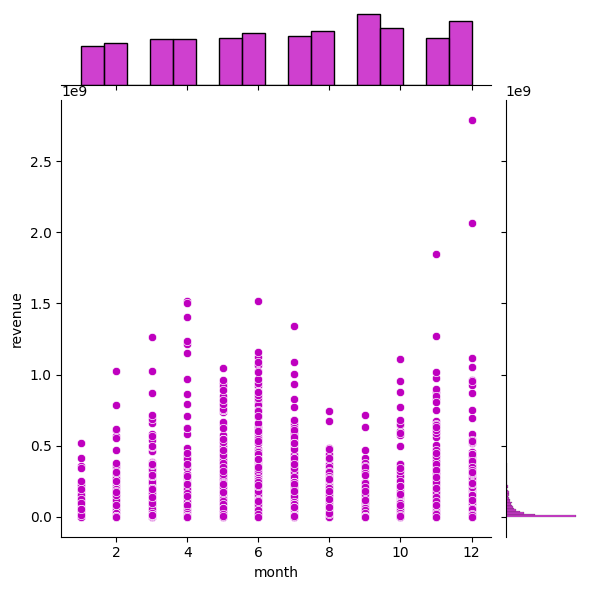

In [52]:
sns.jointplot(x="month", y="revenue", data=df, color="m")

In [53]:
df = df.drop('month', axis=1)
df['holiday'].value_counts()

holiday
1    2743
0    2638
Name: count, dtype: int64

In [54]:
df.runtime.isnull().sum() 

1

In [55]:
df['runtime'] = df['runtime'].fillna(df['runtime'].mean())

In [56]:
df['popularity'] = df['popularity'].apply(convert_to_float).astype('float')

In [57]:
df.vote_average.isnull().sum() 

0

In [58]:
df.vote_count.isnull().sum() 

0

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5381 entries, 0 to 45422
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5381 non-null   float64
 1   genres                5381 non-null   int64  
 2   homepage              5381 non-null   int64  
 3   popularity            5381 non-null   float64
 4   production_companies  5381 non-null   int64  
 5   production_countries  5381 non-null   int64  
 6   revenue               5381 non-null   float64
 7   runtime               5381 non-null   float64
 8   spoken_languages      5381 non-null   int64  
 9   vote_average          5381 non-null   float64
 10  vote_count            5381 non-null   float64
 11  lang_english          5381 non-null   int64  
 12  year                  5381 non-null   float64
 13  holiday               5381 non-null   int64  
dtypes: float64(7), int64(7)
memory usage: 630.6 KB


In [60]:
df1 = df[df.revenue < 1500000000]

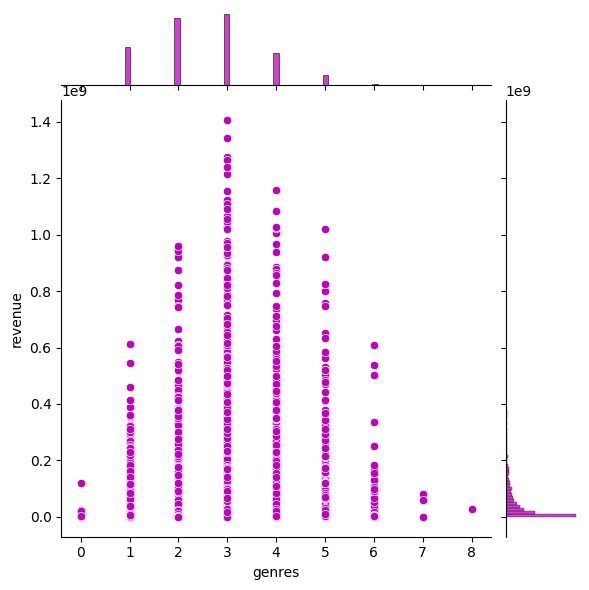

In [61]:
sns.jointplot(x="genres", y="revenue", data=df1, color="m")

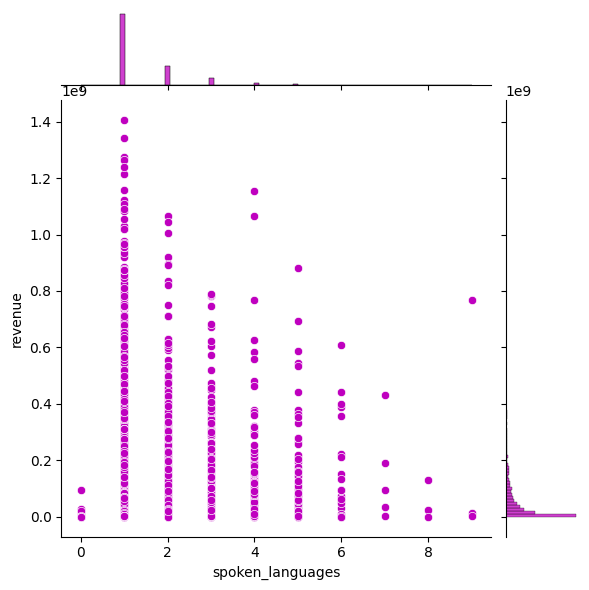

In [62]:
sns.jointplot(x="spoken_languages", y="revenue", data=df1, color="m")

In [63]:
"""
# Chuyển từ dạng bảng sang array

budget_arr = df.budget.values
genres_arr = df.genres.values 
homepage_arr = df.homepage.values 
popularity_arr = df.popularity.values  
production_companies_arr = df.production_companies.values 
production_countries_arr = df.production_countries.values
revenue_arr = df.revenue.values
runtime_arr = df.runtime.values  
spoken_languages_arr = df.spoken_languages.values
vote_average_arr = df.vote_average.values 
vote_count_arr = df.vote_count.values 
lang_english_arr = df.lang_english.values
year_arr = df.year.values
holiday_arr = df.holiday.values
"""

'\n# Chuyển từ dạng bảng sang array\n\nbudget_arr = df.budget.values\ngenres_arr = df.genres.values \nhomepage_arr = df.homepage.values \npopularity_arr = df.popularity.values  \nproduction_companies_arr = df.production_companies.values \nproduction_countries_arr = df.production_countries.values\nrevenue_arr = df.revenue.values\nruntime_arr = df.runtime.values  \nspoken_languages_arr = df.spoken_languages.values\nvote_average_arr = df.vote_average.values \nvote_count_arr = df.vote_count.values \nlang_english_arr = df.lang_english.values\nyear_arr = df.year.values\nholiday_arr = df.holiday.values\n'

In [64]:
"""
import os 
import pandas as pd

data_series = {"budget" : budget_arr, "genres" :genres_arr, "homepage": homepage_arr, "popularity": popularity_arr, "production_companies":production_companies_arr,
               "production_countries":production_countries_arr, "runtime" :runtime_arr, "spoken_languages" :spoken_languages_arr, 
               "vote_average" :vote_average_arr, "vote_count" :vote_count_arr, "lang_english" :lang_english_arr, 
               "year" :year_arr, "holiday" :holiday_arr, "revenue" :revenue_arr}

df_data = pd.DataFrame(data_series)

os.makedirs('./data', exist_ok=True)  
df_data.to_excel('./data/data1.xlsx')  
print('Save to Excel file successfully.')
"""

'\nimport os \nimport pandas as pd\n\ndata_series = {"budget" : budget_arr, "genres" :genres_arr, "homepage": homepage_arr, "popularity": popularity_arr, "production_companies":production_companies_arr,\n               "production_countries":production_countries_arr, "runtime" :runtime_arr, "spoken_languages" :spoken_languages_arr, \n               "vote_average" :vote_average_arr, "vote_count" :vote_count_arr, "lang_english" :lang_english_arr, \n               "year" :year_arr, "holiday" :holiday_arr, "revenue" :revenue_arr}\n\ndf_data = pd.DataFrame(data_series)\n\nos.makedirs(\'./data\', exist_ok=True)  \ndf_data.to_excel(\'./data/data1.xlsx\')  \nprint(\'Save to Excel file successfully.\')\n'